# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from utils import clip, create_feature, scaling, label_encoding, cols_to_remove,class_mapping

In [2]:
print(tf.__version__)

2.17.0


In [3]:
train_data=pd.read_csv("data/train.csv")
test_data=pd.read_csv("data/test.csv")
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# Exploratory Data Analysis (EDA)

In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

three types of data: float, int and object

In [5]:
train_data.describe().style.background_gradient(cmap = "seismic")

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,8.583196,8.882172,125.363971,0.569265,0.003738,0.071382,0.893646,0.315821,0.247393,22.278653,0.006626,0.188871,5.891516,7.352362,4.178520,9.995862,0.057960,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,17.471591,16.803940,12.562328,0.495182,0.061023,0.257463,0.308292,0.464845,0.431500,6.889241,0.081130,1.175296,1.671776,3.508292,2.687995,5.264224,0.408490,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.000000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.000000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [6]:
print(train_data.isnull().sum())

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

There is no null values

In [7]:
train_df=train_data.copy()
train_df=train_df.drop(columns=['id'])
train_df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout


### Distribution of Target

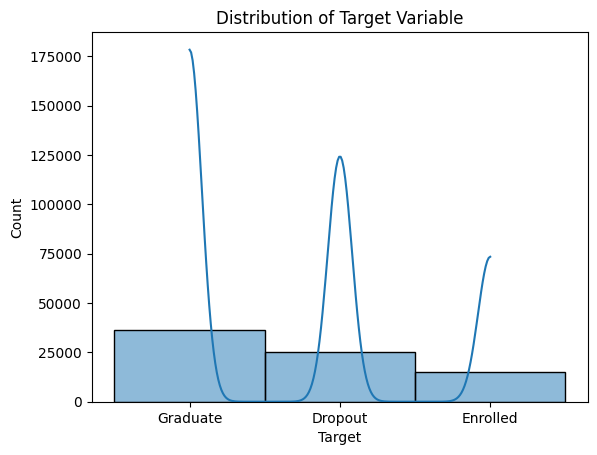

In [8]:
# Distribution of the target variable
sns.histplot(train_df['Target'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
train_data["Target"].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

**Discussion**

The plot indicates the number of instances for each class. Class imbalance ( minor) is present here. The density plot overlaid on the bars provides a smoothed estimate of the distribution, which can help in visualizing the shape of the distribution.

## Boxplots (Visualizing outliers)

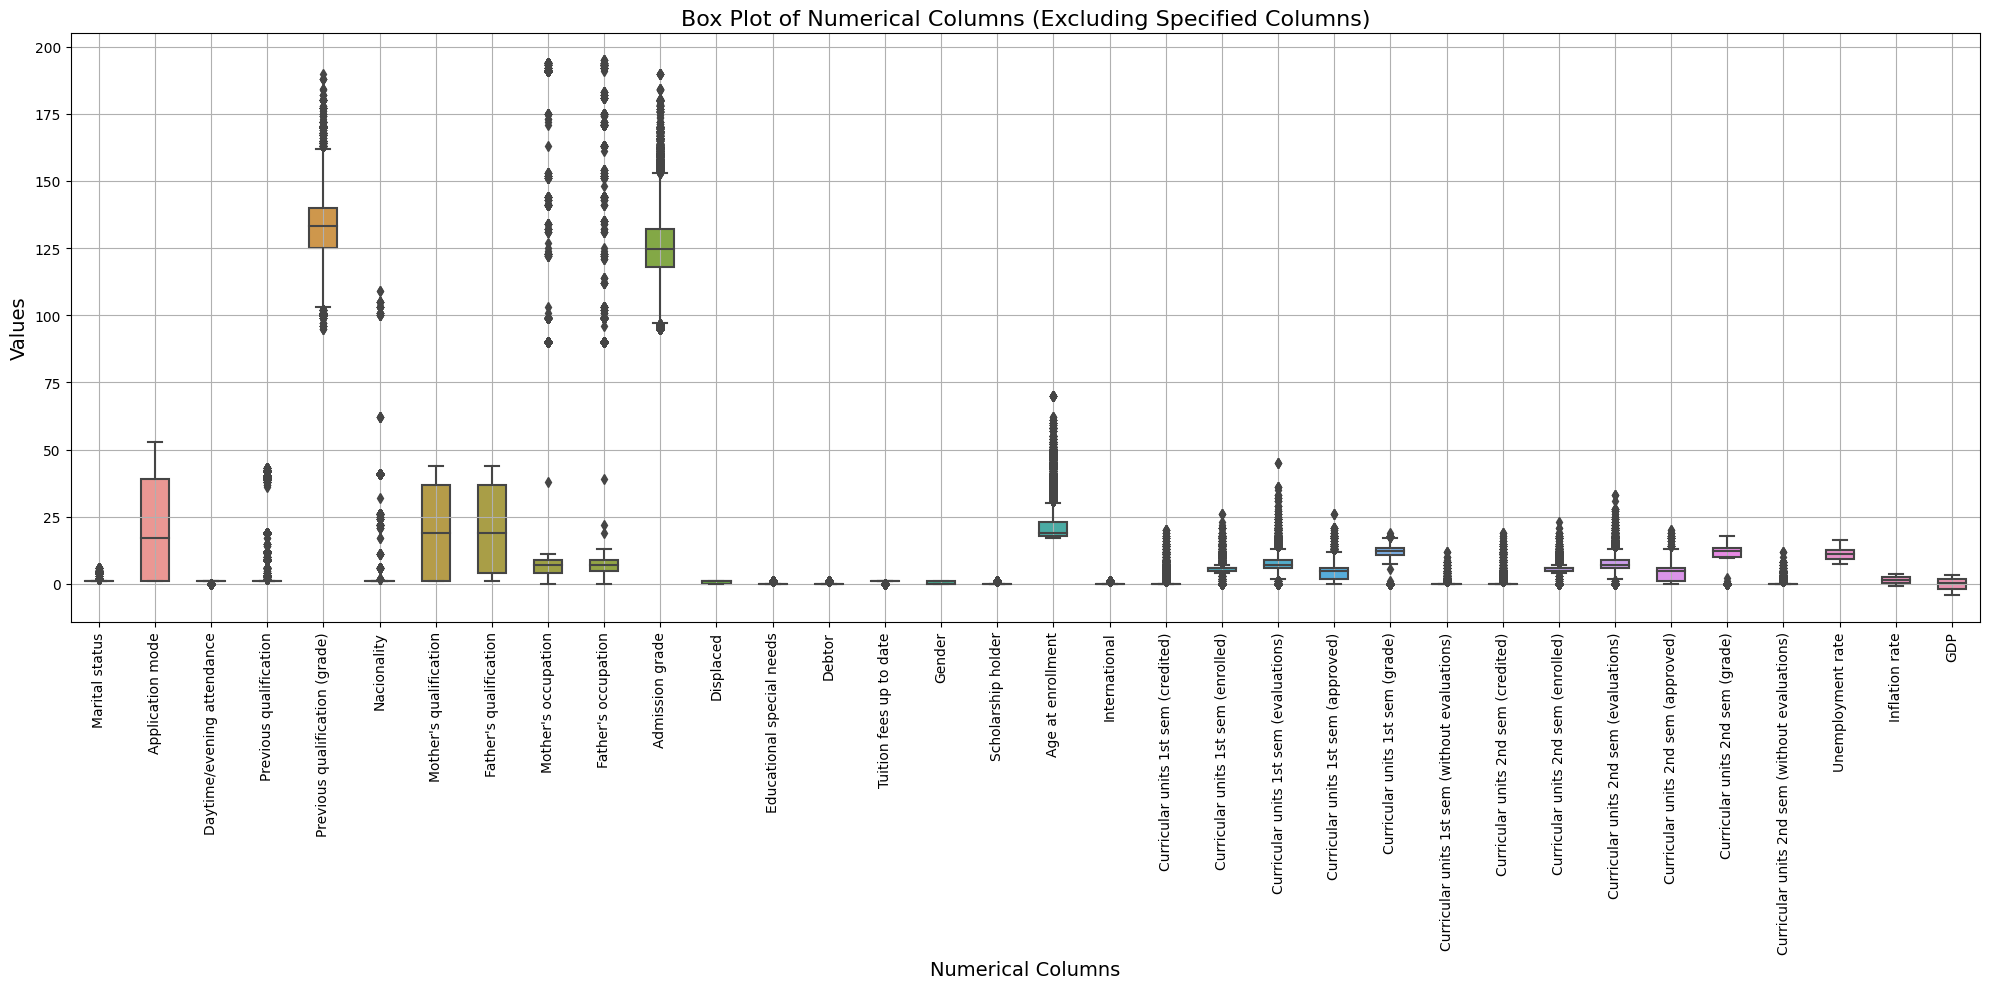

In [10]:
exclude_columns = ['id', 'Application order', 'Course']
numerical_cols = train_data.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_data[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Discussion**

- Marital status: Has a relatively small range with a few outliers.
- Application mode: Shows a wide range, indicating high variability.
- Previous qualification (grade): Has a large number of outliers, suggesting some students have significantly different grades than the majority.
- Admission grade: Has outliers but generally a tighter distribution.
- Curricular units: The grades and evaluations for the 1st and 2nd semesters show some variability, with outliers present.
- GDP, Unemployment rate, Inflation rate: Seem to have less variability, indicating more consistent values across the dataset.


Here to deal with outliers I will use clipping method

**Clipping**: Clipping is a method used to limit the range of data by setting a lower and upper bound. Any data points that fall outside this range are set to the nearest bound. This helps to mitigate the impact of outliers without completely removing them from the dataset.

In [11]:
train_df=clip(train_df)

# Feature Engineering

In [12]:
# apply feature engineering
train_df=create_feature(train_df)
test_df=create_feature(test_data)

In [13]:
train_df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,GDP,Target,Prev_Admission_Interaction,Total_Curricular_Units_1st_Sem,Total_Curricular_Units_2nd_Sem,Total_Curricular_Units,Average_Grade_1st_Sem,Average_Grade_2nd_Sem,Grade_Per_Credited_1st_Sem,Grade_Per_Credited_2nd_Sem
0,1,1,1,9238,1,1,126.0,1,1,19,...,2.02,Graduate,15447.6,18,19,37,2.071429,1.77551,14.5,12.428571
1,1,17,1,9238,1,1,125.0,1,19,19,...,2.02,Dropout,14975.0,18,15,33,1.657143,0.00000,11.6,0.000000


## Label Encoding


In [14]:
cat_cols= ['Marital status', 'Application mode', 'Daytime/evening attendance', 'Nacionality', 'Gender', 'Target']
for val in cat_cols:
    print(f" {val} : { train_df[val].unique()}")
   

 Marital status : [1 2 4 3 5 6]
 Application mode : [ 1 17 39 44  7 18 15 16 53 43 51 42 10  5 12 27  2 26  4 35  9  3]
 Daytime/evening attendance : [1 0]
 Nacionality : [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
 Gender : [0 1]
 Target : ['Graduate' 'Dropout' 'Enrolled']


In [15]:
train_df=label_encoding(train_df,train=True)
test_df=label_encoding(test_df,train=False)

Mapping for Marital status:
 1 -> 0
 2 -> 1
 3 -> 2
 4 -> 3
 5 -> 4
 6 -> 5


Mapping for Application mode:
 1 -> 0
 2 -> 1
 3 -> 2
 4 -> 3
 5 -> 4
 7 -> 5
 9 -> 6
 10 -> 7
 12 -> 8
 15 -> 9
 16 -> 10
 17 -> 11
 18 -> 12
 26 -> 13
 27 -> 14
 35 -> 15
 39 -> 16
 42 -> 17
 43 -> 18
 44 -> 19
 51 -> 20
 53 -> 21


Mapping for Daytime/evening attendance:
 0 -> 0
 1 -> 1


Mapping for Nacionality:
 1 -> 0
 2 -> 1
 6 -> 2
 11 -> 3
 17 -> 4
 21 -> 5
 22 -> 6
 24 -> 7
 25 -> 8
 26 -> 9
 32 -> 10
 41 -> 11
 62 -> 12
 100 -> 13
 101 -> 14
 103 -> 15
 105 -> 16
 109 -> 17


Mapping for Gender:
 0 -> 0
 1 -> 1


Mapping for Target:
 Dropout -> 0
 Enrolled -> 1
 Graduate -> 2




In [16]:
train_df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,GDP,Target,Prev_Admission_Interaction,Total_Curricular_Units_1st_Sem,Total_Curricular_Units_2nd_Sem,Total_Curricular_Units,Average_Grade_1st_Sem,Average_Grade_2nd_Sem,Grade_Per_Credited_1st_Sem,Grade_Per_Credited_2nd_Sem
0,0,0,1,9238,1,1,126.0,0,1,19,...,2.02,2,15447.6,18,19,37,2.071429,1.77551,14.5,12.428571
1,0,11,1,9238,1,1,125.0,0,19,19,...,2.02,0,14975.0,18,15,33,1.657143,0.00000,11.6,0.000000


# Correlation matrix
Correlation matrix shows us the Pearson correlation coefficients between different features in the dataset. It helps us to determine the correlation between each feature and the target variable. Higher correaltion value means the feature is a good predictor for the target. Moreover, it also helps us to identify redundancy. for example if coefficient value for two varibale is high (positively or negatively) then it's a indicative of redundancy. we can remove one of the feature.

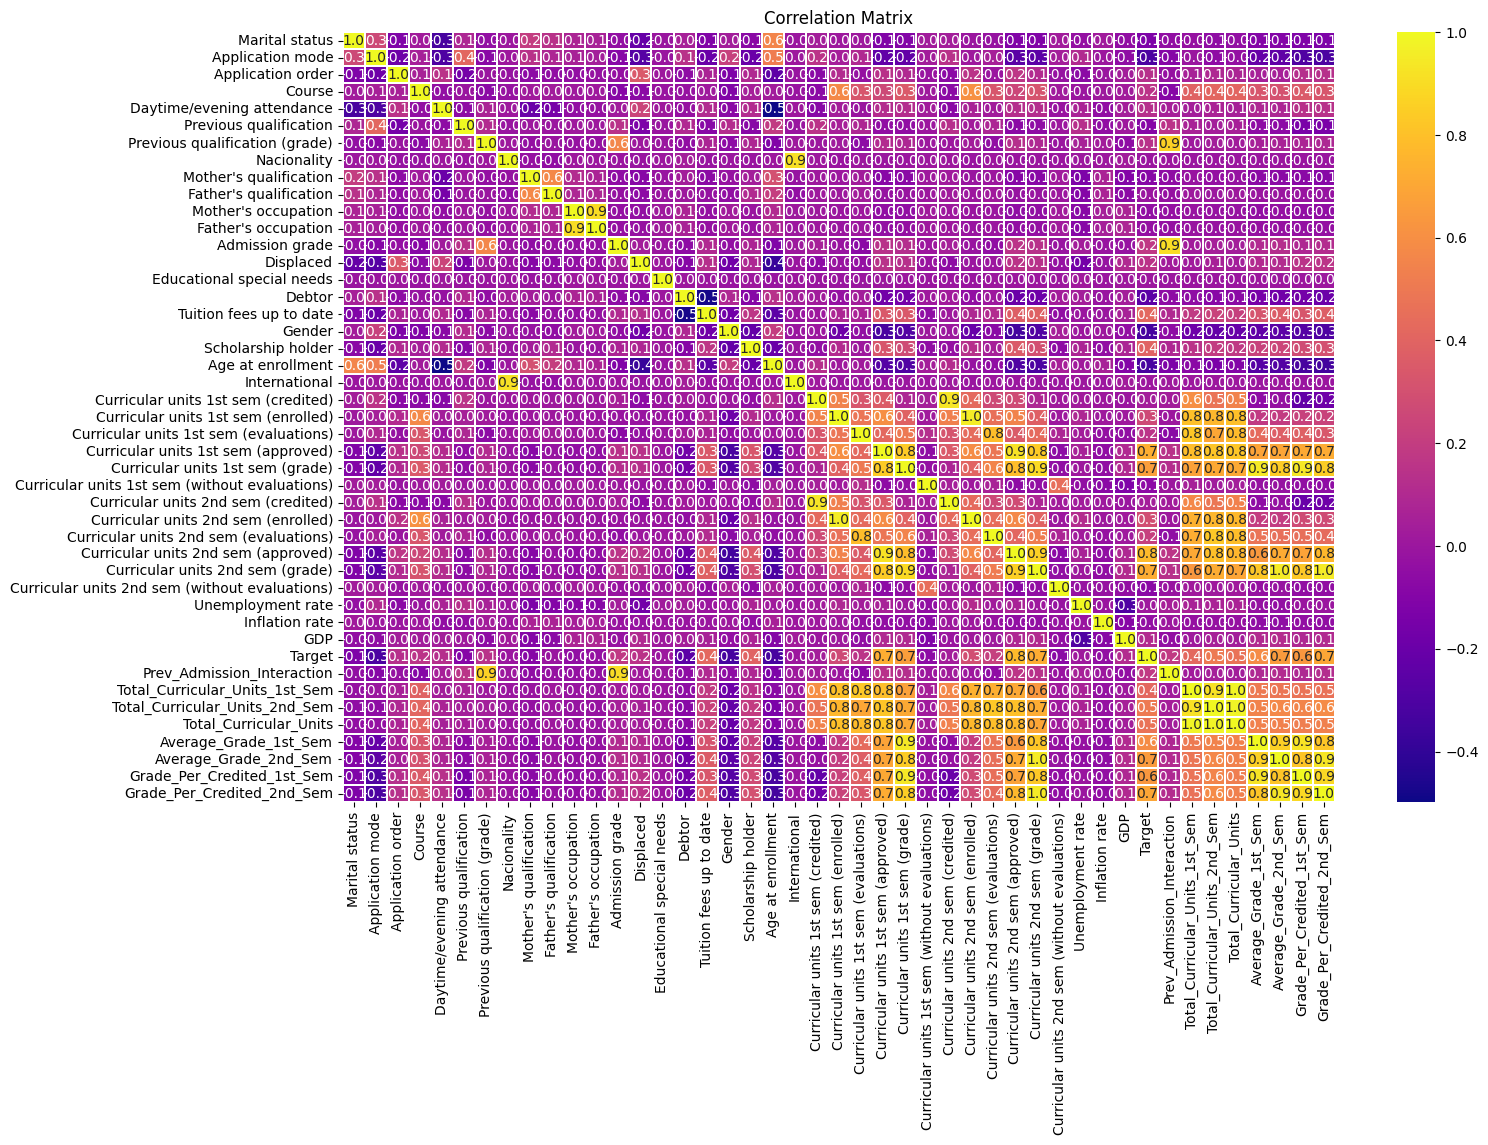

In [17]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".1f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

**Key Observation**
- **Features with 0 correlation value**:
        - id
        - nacionality
        - father's qualification
        - father's occupation,
        - mother's occupation
        - educational special needs
        - international
        - curricular units 1st sem(without evaluation)
        - curricular units 2nd sem(without evaluation)
        - unemployment rate
        - inflation rate.

Thsee features has no significance in predictin the target. Therefore I will delete this features.

- **Multicolinearity** If two features has coefficient value greater than .8 then I will delete one of them. Here the pairs that have greater correlation value : 
        - (previous admission interaction, previous qualification (grade) = .9),
        - (international ,nacionality =.9 : however, these will be deleted first based on their correlation with target),
        - ( curricular units 1st sem(without evaluation),admission grade = .9)
        - curricular units 1st sem (credited), curricular units 2nd sem (credited)=.9
        - curricular units 1st sem (enrolled), curricular units 2nd sem (enrolled)=1
        - curricular units 1st sem (evaluations), curricular units 2nd sem (evaluations)=.8
          **NOTE** There are many in this matrix. So I will simply delete one of those features.
           
           
<!--  Deleting features based on the upper two criterias makes the model simple. However, before deleting any features it requires domain knowledge. I mean with lower correlation value one feauture still can provide   
   significant value in predicting. So considering all the situation, I will delete the following features (in future):
   
    - id (low correlation with target)
    - Application mode (low correlation with target)
    - Daytime/evening attendance (low correlation with target)
    - Previous qualification (grade) (low correlation with target)
    - Mother's occupation (low correlation with target)
    - Father's occupation (low correlation with target)
    - Curricular units 1st sem (credited) and Curricular units 1st sem (enrolled) - remove one based on their individual correlation with the target.
    - Curricular units 2nd sem (credited) and Curricular units 2nd sem (enrolled) - remove one based on their individual correlation with the target. -->


However, Here I am selecting features manually based on my own perception. However, the features can be selected automatically using the follwoing **feature_selection** funtion. The functin removes features that has correlatin matrix less than .1 with the Target. Moreover, removes one of two features which shows multicolinearity. The threshold for this selection is .8.

In [18]:
cols_to_rm=cols_to_remove()
train_df=train_df.drop(columns=cols_to_rm,axis=1)
test_df=test_df.drop(columns=cols_to_rm,axis=1)

### Correlation matrix with selected features

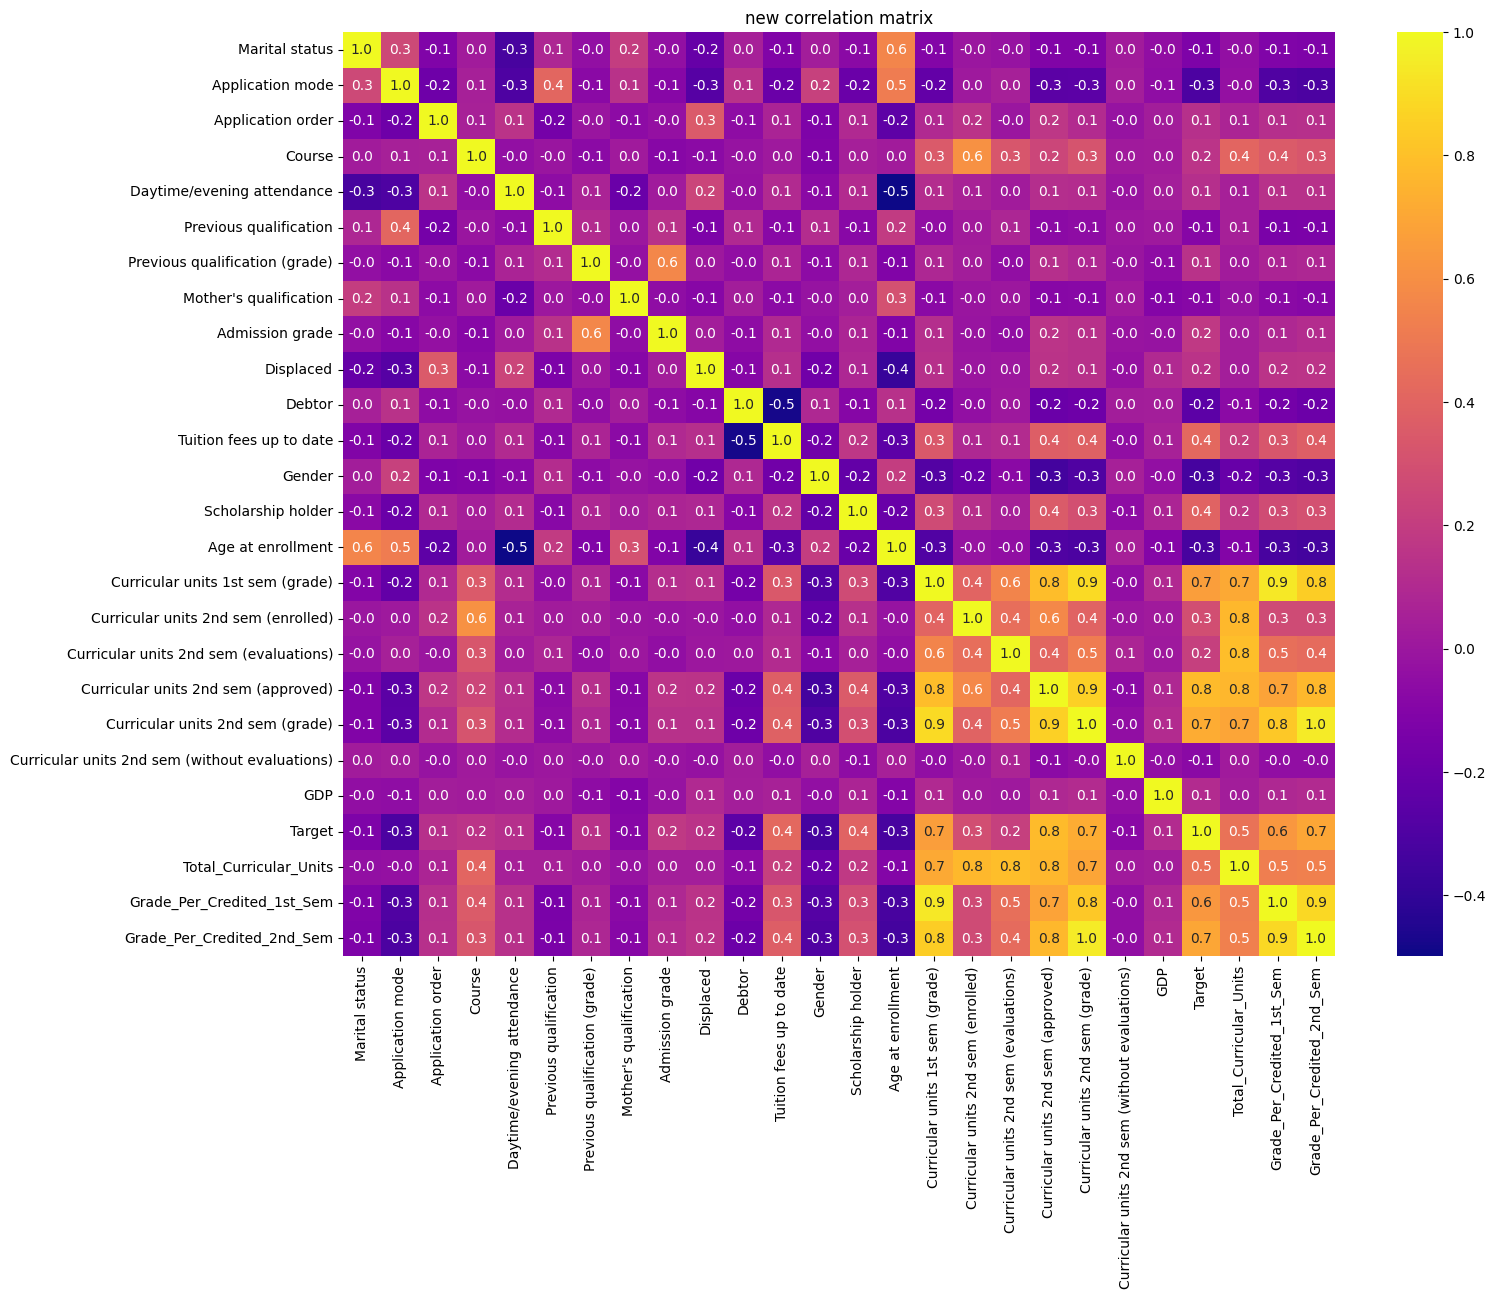

In [19]:
corr_m=train_df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_m,annot=True, cmap="plasma",fmt=".1f")
plt.title("new correlation matrix")
plt.show()

In [20]:
train_df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target,Total_Curricular_Units,Grade_Per_Credited_1st_Sem,Grade_Per_Credited_2nd_Sem
0,0,0,1,9238,1,1,126.0,1,122.6,0,...,6,7,6,12.428571,0,2.02,2,37,14.5,12.428571
1,0,11,1,9238,1,1,125.0,19,119.8,1,...,6,9,0,0.000000,0,2.02,0,33,11.6,0.000000


In [21]:
print(train_df.shape,test_df.shape)

(76518, 26) (51012, 26)


## Scaling

In [22]:
train_df,test_df= scaling(train_df,test_df,is_train=True)

In [23]:
train_df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target,Total_Curricular_Units,Grade_Per_Credited_1st_Sem,Grade_Per_Credited_2nd_Sem
0,-0.253437,-1.014509,-0.524066,0.131258,0.304173,-0.308308,-0.590740,-1.223274,-0.221339,-1.149614,...,0.040921,-0.066933,0.71866,0.505317,-0.135127,0.933176,2,0.153079,0.903794,0.554646
1,-0.253437,0.483879,-0.524066,0.131258,0.304173,-0.308308,-0.684149,-0.054394,-0.448447,0.869857,...,0.040921,0.504003,-1.44511,-1.735681,-0.135127,0.933176,0,-0.141786,0.367413,-1.653104


# Splitting the data

In [24]:
def splitting(df):
    X=df.drop(columns=["Target"],axis=1)
    y=df["Target"]
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.2, random_state=123)
    return X,y, X_train,X_val,y_train,y_val

In [25]:
_,_, X_train,X_val,y_train,y_val=splitting(train_df)

In [26]:
X_train.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,...,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Total_Curricular_Units,Grade_Per_Credited_1st_Sem,Grade_Per_Credited_2nd_Sem
43876,-0.253437,-1.014509,0.289183,0.140130,0.304173,-0.308308,-0.123691,-1.223274,0.354543,0.869857,...,0.855619,0.040921,-0.352401,0.718660,0.728558,-0.135127,-0.372698,0.153079,0.903794,0.774575
72404,-0.253437,1.709832,-0.524066,0.276537,0.304173,-0.308308,0.072469,1.179424,-0.432225,-1.149614,...,0.657021,1.270048,0.218535,1.439917,0.554258,-0.135127,-0.372698,2.511996,-1.467041,-1.277110


# Training 

### Callbacks

In [27]:
xt,yt,xv,yv=X_train,y_train,X_val,y_val

In [28]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=3,verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [29]:
print(xv.shape[1],test_df.shape[1])

25 26


In [30]:
difference = list(set(test_df.columns.tolist()) - set(xv.columns.tolist()))
difference

['id']

In [31]:
test_df=test_df.drop(columns=['id'])

### keras model

In [32]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))

    model.add(Dense( 64,activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    # Output layer
    model.add(Dense(3, activation='softmax'))  

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Example usage:
model = create_model(input_dim=X_train.shape[1])
model.summary()


c:\Users\klikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,011 (261.76 KB)

 Trainable params: 65,731 (256.76 KB)

 Non-trainable params: 1,280 (5.00 KB)

### Fit model

In [33]:
history = model.fit(
      xt,yt,
      validation_data=(xv,yv),
      epochs=30,
      callbacks=[es, lr_scheduler, checkpoint],
    verbose=2
  )
    

Epoch 1/30
1913/1913 - 12s - 6ms/step - accuracy: 0.7634 - loss: 0.6101 - val_accuracy: 0.8048 - val_loss: 0.4952 - learning_rate: 0.0010
Epoch 2/30
1913/1913 - 6s - 3ms/step - accuracy: 0.7939 - loss: 0.5336 - val_accuracy: 0.8102 - val_loss: 0.4841 - learning_rate: 0.0010
Epoch 3/30
1913/1913 - 6s - 3ms/step - accuracy: 0.8016 - loss: 0.5204 - val_accuracy: 0.8121 - val_loss: 0.4843 - learning_rate: 0.0010
Epoch 4/30
1913/1913 - 6s - 3ms/step - accuracy: 0.8024 - loss: 0.5149 - val_accuracy: 0.8112 - val_loss: 0.4843 - learning_rate: 0.0010
Epoch 5/30
1913/1913 - 6s - 3ms/step - accuracy: 0.8060 - loss: 0.5092 - val_accuracy: 0.8106 - val_loss: 0.4789 - learning_rate: 0.0010
Epoch 6/30
1913/1913 - 5s - 3ms/step - accuracy: 0.8072 - loss: 0.5037 - val_accuracy: 0.8140 - val_loss: 0.4786 - learning_rate: 0.0010
Epoch 7/30
1913/1913 - 5s - 3ms/step - accuracy: 0.8088 - loss: 0.5023 - val_accuracy: 0.8133 - val_loss: 0.4775 - learning_rate: 0.0010
Epoch 8/30
1913/1913 - 5s - 3ms/step - a

### Plotting curves (accuracy, loss, confusion matrix etc.)

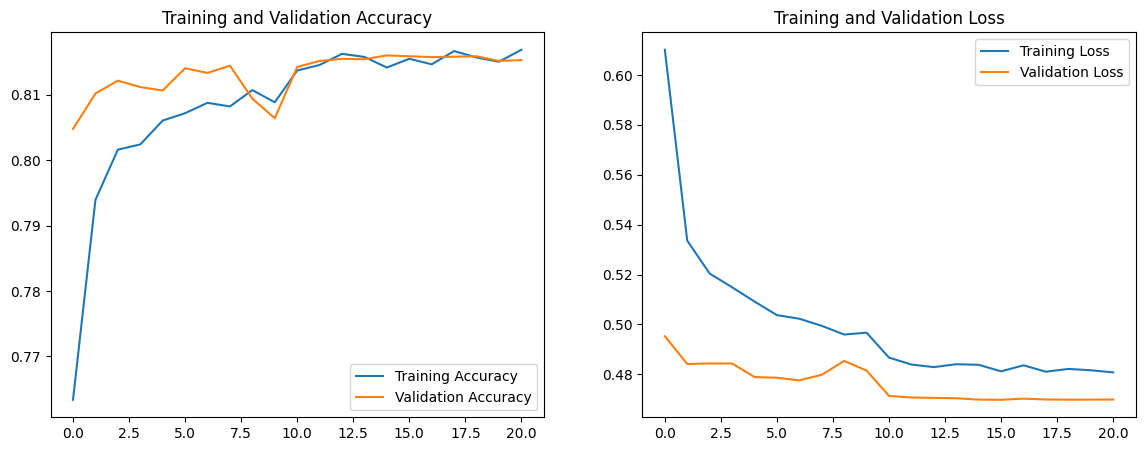

In [34]:
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
plot_accuracy_loss(history)

**Confusion Matrix**

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


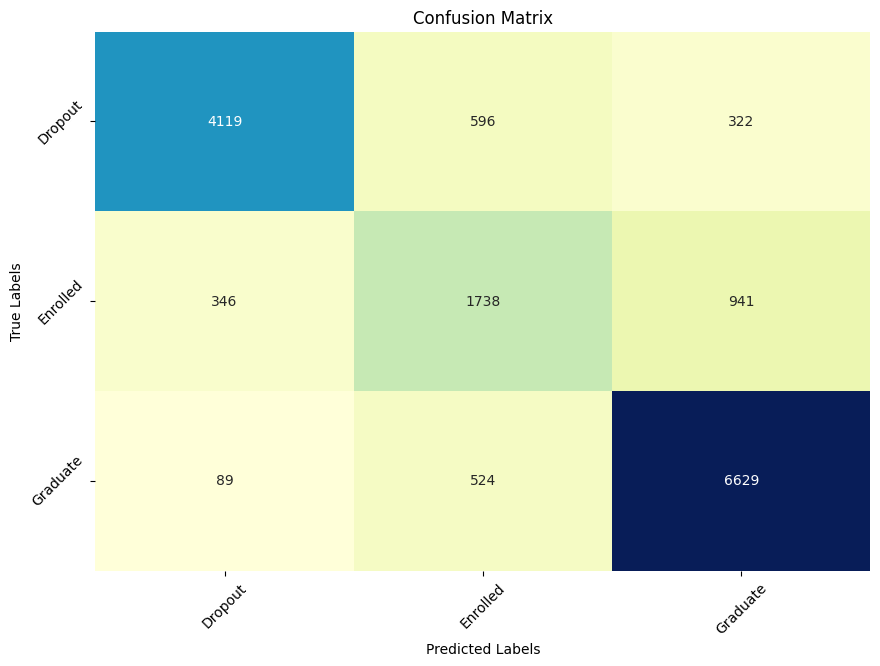

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob,axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

class_names = ['Dropout', 'Enrolled', 'Graduate']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names, cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.show()

**Explanation of Confusion matrix**:

In [36]:
precision = precision_score(y_val, y_val_pred, average=None)
recall = recall_score(y_val, y_val_pred, average=None)
f1 = f1_score(y_val, y_val_pred, average=None)

# Display the results
for i, class_name in enumerate(class_names):
    print(f"{class_name}:")
    print(f" Precision: {precision[i]:.2f}")
    print(f" Recall: {recall[i]:.2f}")
    print(f" F1 Score: {f1[i]:.2f}")
    print()

# Overall report
print(classification_report(y_val, y_val_pred, target_names=class_names))


Dropout:
 Precision: 0.90
 Recall: 0.82
 F1 Score: 0.86

Enrolled:
 Precision: 0.61
 Recall: 0.57
 F1 Score: 0.59

Graduate:
 Precision: 0.84
 Recall: 0.92
 F1 Score: 0.88

              precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      5037
    Enrolled       0.61      0.57      0.59      3025
    Graduate       0.84      0.92      0.88      7242

    accuracy                           0.82     15304
   macro avg       0.78      0.77      0.78     15304
weighted avg       0.82      0.82      0.81     15304



# Prediction on test set and save submission file

In [37]:
predictions=model.predict(test_df)
classes=np.argmax(predictions,axis=1)


1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [38]:
result=pd.DataFrame({"id":test_data["id"].values, "Target":classes})

In [39]:
result.head()

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1


In [40]:
predicted_class=class_mapping(result)
predicted_class.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


# Creating the pickl file

In [41]:
import pickle as pk
with open("graduate_classifier.pkl", "wb") as pkl_out:
    pk.dump(model, pkl_out)

# Let's make a prediction function

In [42]:
sample_input = {
    "Marital status": 1,
    "Application mode": 1,
    "Application order": 1,
    "Course": 9238,
    "Daytime/evening attendance": 1,
    "Previous qualification": 1,
    "Previous qualification (grade)": 126.0,
    "Nacionality": 1,
    "Mother's qualification": 1,
    "Father's qualification": 19,
    "Mother's occupation": 5,
    "Father's occupation": 5,
    "Admission grade": 122.6,
    "Displaced": 0,
    "Educational special needs": 0,
    "Debtor": 0,
    "Tuition fees up to date": 1,
    "Gender": 0,
    "Scholarship holder": 1,
    "Age at enrollment": 18,
    "International": 0,
    "Curricular units 1st sem (credited)": 0,
    "Curricular units 1st sem (enrolled)": 6,
    "Curricular units 1st sem (evaluations)": 6,
    "Curricular units 1st sem (approved)": 6,
    "Curricular units 1st sem (grade)": 14.5,
    "Curricular units 1st sem (without evaluations)": 0,
    "Curricular units 2nd sem (credited)": 0,
    "Curricular units 2nd sem (enrolled)": 6,
    "Curricular units 2nd sem (evaluations)": 7,
    "Curricular units 2nd sem (approved)": 6,
    "Curricular units 2nd sem (grade)": 12.428571,
    "Curricular units 2nd sem (without evaluations)": 0,
    "Unemployment rate": 11.1,
    "Inflation rate": 0.6,
    "GDP": 2.02
}


In [43]:
def predict(input_data):
    input_data=pd.DataFrame([input_data])


    input_data=clip(input_data)
    input_data=create_feature(input_data)
    input_data=label_encoding(input_data,train=False)
    cols=cols_to_remove()
    input_data=input_data.drop(columns=cols,axis=1)
    input_data = scaling(test_df=input_data, is_train=False)


    predictions = model.predict(input_data)
    predicted_class=np.argmax(predictions,axis=1)
    predicted_class=class_mapping(predicted_class)
    # cls_map = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
    # predicted_class= np.array([cls_map.get(x, 'Unknown') for x in predicted_class])
    return {"prediction":predicted_class}


In [44]:
output_class=predict(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [45]:
print(output_class)

{'prediction': array(['Graduate'], dtype='<U8')}


In [46]:
a=[12]
print(type(a))

<class 'list'>
